In [5]:


import pandas as pd

cr=pd.read_csv(r'C:\Users\divya\Downloads\Project1\crashes.csv', usecols=['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE','LONGITUDE'])
per=pd.read_csv(r'C:\Users\divya\Downloads\Project1\persons.csv', usecols=['REPORT_NO','SEX_DESC','DATE_OF_BIRTH','LICENSE_STATE_CODE'])
veh=pd.read_csv(r'C:\Users\divya\Downloads\Project1\vehicles.csv', usecols=['REPORT_NO','VEH_YEAR','VEH_MAKE','SPEED_LIMIT'])

merged_df=pd.merge(cr,per, on ='REPORT_NO')

updated_merged_df=pd.merge(merged_df,veh, on='REPORT_NO')

#print(updated_merged_df)

updated_merged_df.to_csv(r'C:\Users\divya\Downloads\Project1\md_crash_2020.csv',index=False)

In [6]:


import pandas as pd
from datetime import datetime

crashes = pd.read_csv('C:/Users/divya/Downloads/Project1/crashes.csv', usecols=['REPORT_NO', 'COUNTY_DESC', 'ACC_DATE'])
persons = pd.read_csv('C:/Users/divya/Downloads/Project1/persons.csv', usecols=['REPORT_NO','DATE_OF_BIRTH', 'PERSON_TYPE_DESC'])

merged_df = pd.merge(crashes, persons, on='REPORT_NO')

drivers_df = merged_df[merged_df['PERSON_TYPE_DESC'] == 'Driver'].copy()

drivers_df['DATE_OF_BIRTH'] = pd.to_datetime(drivers_df['DATE_OF_BIRTH'], format='%Y%m%d')
now = datetime.now()

drivers_df.loc[:, 'AGE'] = (now - drivers_df['DATE_OF_BIRTH']).astype('<m8[Y]')

county_averages = drivers_df.groupby('COUNTY_DESC')['AGE'].mean().reset_index()
county_averages.rename(columns={'AGE': 'AVG_DRIVER_AGE'}, inplace=True)
county_averages.sort_values(by='AVG_DRIVER_AGE', inplace=True)

print(county_averages[['COUNTY_DESC', 'AVG_DRIVER_AGE']])

        COUNTY_DESC  AVG_DRIVER_AGE
3    Baltimore City       41.689563
23        Worcester       41.902493
16  Prince George's       41.947047
8           Charles       42.341565
19       St. Mary's       42.530536
13           Howard       42.561441
10        Frederick       42.604714
2         Baltimore       42.618197
11          Garrett       42.620401
1      Anne Arundel       43.094910
22         Wicomico       43.137584
4           Calvert       43.196980
17     Queen Anne's       43.511516
15       Montgomery       43.558075
21       Washington       43.689073
5          Caroline       43.709480
7             Cecil       43.823502
12          Harford       43.946988
0          Allegany       44.177202
6           Carroll       44.446394
9        Dorchester       44.622781
14             Kent       45.025641
20           Talbot       45.455544
18         Somerset       45.871148


In [7]:


import pandas as pd
from datetime import datetime

crashes = pd.read_csv('C:/Users/divya/Downloads/Project1/md_crash_2020.csv')

crashes_by_veh_make = crashes.groupby('VEH_MAKE')['REPORT_NO'].nunique().sort_values(ascending=False)

#Question-3(b)

now = datetime.now().year
crashes['VEHICLE_AGE'] = now - crashes['VEH_YEAR']
avg_age_by_veh_make = crashes.groupby('VEH_MAKE')['VEHICLE_AGE'].mean().reset_index()
avg_age_by_veh_make.columns = ['Vehicle Make', 'Average Vehicle Age']
avg_age_by_veh_make.sort_values(by='Average Vehicle Age', inplace=True)

# Print the results
print('Total number of crashes by vehicle make:')
print(crashes_by_veh_make)
print('\nAverage age of vehicles by vehicle make:')
print(avg_age_by_veh_make)

Total number of crashes by vehicle make:
VEH_MAKE
FORD           19374
HONDA          15785
TOYOTA         15140
NISSAN         11057
UNKNOWN        10052
               ...  
KIAN               1
KIAL               1
KIA SORENTO        1
KIA - BLACK        1
`BUIC              1
Name: REPORT_NO, Length: 2433, dtype: int64

Average age of vehicles by vehicle make:
           Vehicle Make  Average Vehicle Age
2218             UKNOWN         -1983.333333
270                  99         -1691.285714
1091            HYUANDA          -890.000000
422           CADDILLAC          -238.333333
1324           KAWASAKI           -92.623810
...                 ...                  ...
2217                UKN          2023.000000
2397             WUSSIL          2023.000000
463   CASE CONSTRUCTION          2023.000000
1512           MEDIC 26          2023.000000
1462          MADVAC LN          2023.000000

[2433 rows x 2 columns]


In [8]:


import math
import pandas as pd
md_crash_2020 = pd.read_csv('C:/Users/divya/Downloads/Project1/md_crash_2020.csv')
center_point = (39.016149, -77.117942)
radius = 5  

def calculate_distance(coord1, coord2):
    latitude1, longitude1 = coord1
    latitude2, longitude2 = coord2
    radius_earth_km = 6371  # approximate radius of the earth in km
    latitude_diff = math.radians(latitude2 - latitude1)
    longitude_diff = math.radians(longitude2 - longitude1)
    a = math.sin(latitude_diff/2)**2 + math.cos(math.radians(latitude1)) * math.cos(math.radians(latitude2)) * math.sin(longitude_diff/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance_km = radius_earth_km * c
    return distance_km

md_crash_2020['DISTANCE'] = md_crash_2020.apply(lambda row: calculate_distance((row['LATITUDE'], row['LONGITUDE']), center_point), axis=1)
accidents_in_circle = md_crash_2020[md_crash_2020['DISTANCE'] <= radius]

print("Accidents within 5 km of center point:")
print(accidents_in_circle[['REPORT_NO', 'LATITUDE', 'LONGITUDE','ACC_DATE','ACC_TIME']])

#Question-4(b)
speed_51 = len(md_crash_2020[(md_crash_2020['SPEED_LIMIT'] > 51) & (md_crash_2020['DISTANCE'] <= radius)])
print(f"\nNumber of accidents where speed limit was higher than 51 miles/hr: ", speed_51)

#Question-4(c)
speed_41 = len(md_crash_2020[(md_crash_2020['SPEED_LIMIT'] < 41) & (md_crash_2020['DISTANCE'] <= radius)])
print("\nNumber of accidents where speed limit was lower than 41 miles/hr: ", speed_41)


Accidents within 5 km of center point:
          REPORT_NO   LATITUDE  LONGITUDE  ACC_DATE  ACC_TIME
43      MCP23720030  39.051871 -77.111598  20200630  11:05:00
44      MCP23720030  39.051871 -77.111598  20200630  11:05:00
499     MCP3034004C  38.992230 -77.096740  20201203  16:07:00
500     MCP3034004C  38.992230 -77.096740  20201203  16:07:00
725     MCP3085002C  39.026033 -77.108211  20200519  16:57:00
...             ...        ...        ...       ...       ...
411475  MCP30300035  39.048730 -77.124483  20200121  15:07:00
411476  MCP30300035  39.048730 -77.124483  20200121  15:07:00
411477  MCP30300035  39.048730 -77.124483  20200121  15:07:00
411478  MCP30300035  39.048730 -77.124483  20200121  15:07:00
411583  MCP2726004Q  39.051132 -77.133055  20200323  14:25:00

[6548 rows x 5 columns]

Number of accidents where speed limit was higher than 51 miles/hr:  2947

Number of accidents where speed limit was lower than 41 miles/hr:  3510


In [9]:

states_to_exclude = ["DC", "MD", "VA"]
drivers_df = pd.read_csv('C:/Users/divya/Downloads/Project1/states_drivers.csv')
drivers_filtered = drivers_df[~drivers_df.STATE.isin(states_to_exclude)]
LinDv_car_crash = drivers_filtered.groupby('STATE').sum()
display(LinDv_car_crash)

#Question-5(b)

md_crash_2020 = pd.read_csv('C:/Users/divya/Downloads/Project1/md_crash_2020.csv')
acc_gend = md_crash_2020[["SEX_DESC", "LICENSE_STATE_CODE"]]
acc_gend = acc_gend.groupby(["LICENSE_STATE_CODE"])["SEX_DESC"].value_counts().unstack().fillna(0)

for column in acc_gend.columns:
    acc_gend[column] = acc_gend[column] / acc_gend[column].abs().max()
display(acc_gend)


,MALE,FEMALE
STATE,,
Alabama,"1,896,942","2,010,096"
Alaska,"251,993","281,234"
Arizona,"2,502,985","2,475,777"
Arkansas,"1,041,548","1,078,030"
California,"12,968,614","12,564,306"
Colorado,"2,037,265","1,937,256"
Connecticut,"1,267,221","1,299,452"
Delaware,"360,931","381,593"
Dist. of Col.,"223,265","232,337"


SEX_DESC,Female,Male,Unknown
LICENSE_STATE_CODE,,,
AB,0.000021,0.000000,0.000000
AK,0.000203,0.000198,0.001631
AL,0.000438,0.000458,0.000000
AR,0.000246,0.000253,0.000000
AS,0.000000,0.000014,0.000000
...,...,...,...
WI,0.000235,0.000342,0.000000
WV,0.006258,0.006833,0.004894
WY,0.000053,0.000103,0.000000


In [10]:

import warnings
warnings.filterwarnings('ignore')

crashes = pd.read_csv("C:/Users/divya/Downloads/Project1/crashes.csv")

crashes["DayOfWeek"] = pd.to_datetime(crashes["ACC_DATE"]).dt.day_name()

crashes_by_day = crashes.groupby("DayOfWeek").size().reset_index(name="Count")

crashes_by_day = crashes_by_day.sort_values("Count", ascending=False)

most_crashes_day = crashes_by_day.iloc[0]["DayOfWeek"]
print("Day of the week with the most crashes is:", most_crashes_day)

#Question-6(b)

crashes["Hour"] = pd.to_datetime(crashes["ACC_TIME"]).dt.hour

hour_counts = crashes.groupby("Hour").size().reset_index(name="Count")

max_hour = hour_counts.loc[hour_counts["Count"].idxmax()]["Hour"]
print("Hours:",max_hour)


Day of the week with the most crashes is: Thursday
Hours: 17


In [11]:

acc = pd.read_csv('C:/Users/divya/Downloads/Project1/MD2020_Rain_Snow.csv', usecols=['Date', 'Precip in.', 'Snow in.'])
acc['Rain/Snow'] = (acc['Precip in.'] > 0.05) | (acc['Snow in.'] > 1)
rainy_snow_count = acc['Rain/Snow'].value_counts()
ratio_for_rain_to_nonrain = rainy_snow_count[True] / rainy_snow_count[False]
print("Ratio of accidents on rainy/snowy days to non-rainy/snowy days:", ratio_for_rain_to_nonrain)

#Question-7(b)

print("\nThe ratio of accidents on days with rainy or snowy weather conditions compared to days with non-rainy or non-snowy conditions can provide insight into the impact of weather on the likelihood of accidents. A higher ratio may indicate a greater likelihood of accidents on days with adverse weather conditions, highlighting the need for drivers to take appropriate safety measures when driving in such conditions.")



Ratio of accidents on rainy/snowy days to non-rainy/snowy days: 0.5574468085106383

The ratio of accidents on days with rainy or snowy weather conditions compared to days with non-rainy or non-snowy conditions can provide insight into the impact of weather on the likelihood of accidents. A higher ratio may indicate a greater likelihood of accidents on days with adverse weather conditions, highlighting the need for drivers to take appropriate safety measures when driving in such conditions.


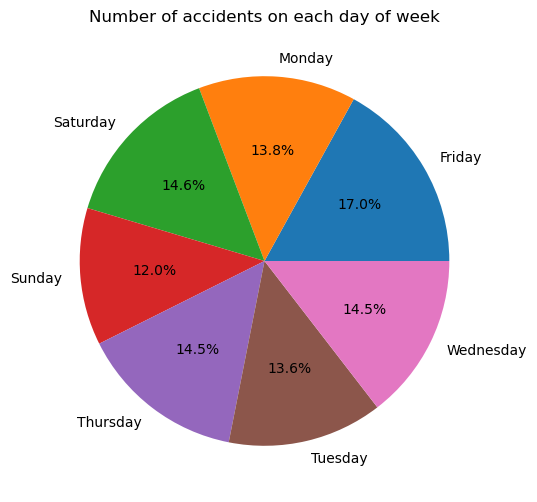

In [12]:


import matplotlib.pyplot as plt

md_crash_2020 = pd.read_csv('C:/Users/divya/Downloads/Project1/md_crash_2020.csv')
md_crash_2020["ACC_DATE"] = pd.to_datetime(md_crash_2020["ACC_DATE"], format="%Y%m%d")
md_crash_2020["day_of_week"] = md_crash_2020["ACC_DATE"].dt.day_name()
accident_day = md_crash_2020["day_of_week"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(x=accident_day.values, labels=accident_day.index, autopct='%1.1f%%')
ax.set_title("Number of accidents on each day of week")
plt.show()
